Process perspective
===================

Considering following instructions:
* Try to understand the file 'simple.csv' and how to read it.
* Understand the sorting of output
* Test the instruction *print log* and *print len(log)*

In [1]:
# Listing 8 Reading and printing an event log with a dictionary

f = open('simple.csv', 'r')

log = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue
    [caseid, task, user, timestamp] = line.split(';')
    if caseid not in log:
        log[caseid] = []
    event = (task, user, timestamp)
    log[caseid].append(event)
    
f.close()

#Listing 10 Sorting the output by caseid and the events by timestamp

for caseid in sorted(log.keys()):
    log[caseid].sort(key = lambda event: event[-1])
    for (task, user, timestamp) in log[caseid]:
        print caseid, task, user, timestamp


1 a u1 2016-04-09 17:36:47
1 b u3 2016-04-11 09:11:13
1 d u6 2016-04-12 10:00:12
1 e u7 2016-04-12 18:21:32
1 f u8 2016-04-13 13:27:41
1 g u6 2016-04-18 19:14:14
1 h u2 2016-04-19 16:48:16
2 a u2 2016-04-14 08:56:09
2 b u3 2016-04-14 09:36:02
2 d u5 2016-04-15 10:16:40
2 g u6 2016-04-19 15:39:15
2 e u7 2016-04-20 14:39:45
2 f u8 2016-04-22 09:16:16
2 h u1 2016-04-26 12:19:46
3 a u2 2016-04-25 08:39:24
3 b u4 2016-04-29 10:56:14
3 c u1 2016-04-30 15:41:22


In [2]:
# Listing 11 Implementing the control-flow algorithm in Python

F = dict()
for caseid in log:
    for i in range(0, len(log[caseid])-1):
        ai = log[caseid][i][0]
        aj = log[caseid][i+1][0] 
        if ai not in F:
            F[ai] = dict()
        if aj not in F[ai]:
            F[ai][aj] = 0
        F[ai][aj] += 1

for ai in sorted(F.keys()):
    for aj in sorted(F[ai].keys()):
        print ai, '->', aj, ':', F[ai][aj]


a -> b : 3
b -> c : 1
b -> d : 2
d -> e : 1
d -> g : 1
e -> f : 2
f -> g : 1
f -> h : 1
g -> e : 1
g -> h : 1


Considerer following instructions:
* Understand how to count each transition
* Test the file generated by *print G* and draw G in the webpage https://dreampuf.github.io/GraphvizOnline/

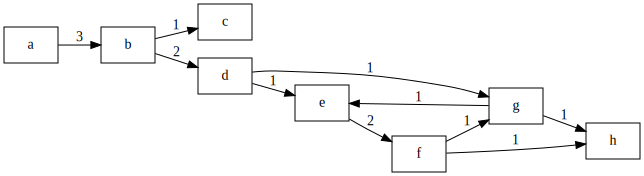

In [3]:
# Listing 13 Definition of a directed graph in Graphviz’s DOT language

import graphviz as gv

G = gv.Digraph(strict=False)
G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

for ai in F:
    for aj in F[ai]:
        G.edge(ai, aj, label=str(F[ai][aj]))

G

Consider the following instructions:
* How to setting the edge thickness according to the transition count
* How to create the *edges*

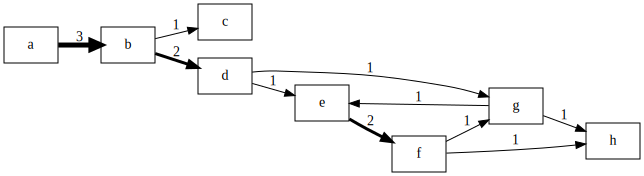

In [4]:
# Listing 15 Setting the edge thickness according to the transition count

import graphviz as gv

G = gv.Digraph(strict=False)
G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

values = [F[ai][aj] for ai in F for aj in F[ai]]
x_min = min(values)
x_max = max(values)
y_min = 1.0
y_max = 5.0

for ai in F:
    for aj in F[ai]:
        x = F[ai][aj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ai, aj, label=str(x), penwidth=str(y))

G

Consider the following instructions:
* How to setting the color according to the task count
* How to write the number of tasks

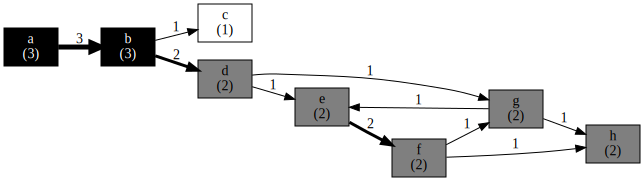

In [5]:
# Listing 17 Including the activity counts in the graph

import graphviz as gv

G = gv.Digraph(strict=False)
G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

A = dict()
for caseid in log:
    for i in range(0, len(log[caseid])):
        ai = log[caseid][i][0]
        if ai not in A:
            A[ai] = 0
        A[ai] += 1

x_min = min(A.values())
x_max = max(A.values())
for ai in A:
    text = ai + '\n(' + str(A[ai]) + ')'
    gray = int(float(x_max - A[ai]) / float(x_max - x_min) * 100.)
    fill = 'gray' + str(gray)
    font = 'black'
    if gray < 50:
        font = 'white'
    G.node(ai, label=text, style='filled', fillcolor=fill, fontcolor=font)

values = [F[ai][aj] for ai in F for aj in F[ai]]
x_min = min(values)
x_max = max(values)
y_min = 1.0
y_max = 5.0
for ai in F:
    for aj in F[ai]:
        x = F[ai][aj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ai, aj, label=str(x), penwidth=str(y))

G

Consider how to read *timestamps*

In [6]:
# Listing 31 Parsing the timestamps when reading the event log
import datetime

f = open('simple.csv', 'r')

log = dict()

for line in f:
    line = line.strip()
    if len(line) == 0:
        continue
    parts = line.split(';')
    caseid = parts[0]
    task = parts[1]
    user = parts[2]
    timestamp = datetime.datetime.strptime(parts[3], '%Y-%m-%d %H:%M:%S')
    if caseid not in log:
        log[caseid] = []
    event = (task, user, timestamp)
    log[caseid].append(event)
    
f.close()

for caseid in log:
    for (task, user, timestamp) in log[caseid]:
        print caseid, task, user, timestamp

1 a u1 2016-04-09 17:36:47
1 b u3 2016-04-11 09:11:13
1 d u6 2016-04-12 10:00:12
1 e u7 2016-04-12 18:21:32
1 f u8 2016-04-13 13:27:41
1 g u6 2016-04-18 19:14:14
1 h u2 2016-04-19 16:48:16
3 a u2 2016-04-25 08:39:24
3 b u4 2016-04-29 10:56:14
3 c u1 2016-04-30 15:41:22
2 a u2 2016-04-14 08:56:09
2 b u3 2016-04-14 09:36:02
2 d u5 2016-04-15 10:16:40
2 g u6 2016-04-19 15:39:15
2 e u7 2016-04-20 14:39:45
2 f u8 2016-04-22 09:16:16
2 h u1 2016-04-26 12:19:46


Understand how to calculate the average timestamp as difference for each transition

In [7]:
# Listing 32 Calculating the average timestamp difference for each transition
D = dict()
for caseid in log:
    for i in range(0,len(log[caseid])-1):
        (ai,_,ti) = log[caseid][i]
        (aj,_,tj) = log[caseid][i+1]
        if ai not in D:
            D[ai] = dict()
        if aj not in D[ai]:
            D[ai][aj] = []
        D[ai][aj].append(tj-ti)
        
for ai in sorted(D.keys()):
    for aj in sorted(D[ai].keys()):
        sum_td = sum(D[ai][aj], datetime.timedelta(0))
        count_td = len(D[ai][aj])
        avg_td = sum_td/count_td
        avg_td -= datetime.timedelta(microseconds=avg_td.microseconds)
        D[ai][aj] = avg_td
        print ai, '->', aj, ':', D[ai][aj]

a -> b : 1 day, 22:10:23
b -> c : 1 day, 4:45:08
b -> d : 1 day, 0:44:48
d -> e : 8:21:20
d -> g : 4 days, 5:22:35
e -> f : 1 day, 6:51:20
f -> g : 5 days, 5:46:33
f -> h : 4 days, 3:03:30
g -> e : 23:00:30
g -> h : 21:34:02


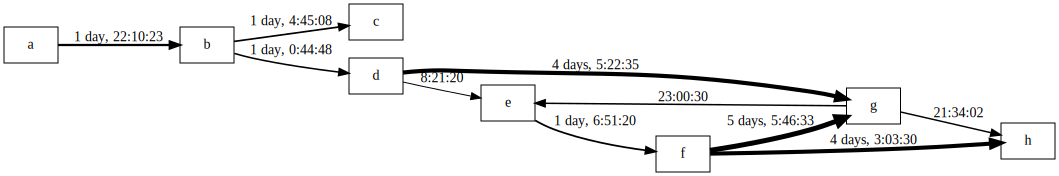

In [8]:
# Listing 34 Drawing the graph with average timestamp differences

import graphviz as gv

G = gv.Digraph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'box'

values = [D[ai][aj].total_seconds() for ai in D for aj in D[ai]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ai in D:
    for aj in D[ai]:
        x = D[ai][aj].total_seconds()
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ai, aj, label=str(D[ai][aj]), penwidth=str(y))

G

Organizational mining
=====================

> *Handover* measure

Consider the command *print H*

In [9]:
# Listing 20 Implementing the handover-of-work algorithm in Python

H = dict()

for caseid in log:
    for i in range(0, len(log[caseid])-1):
        ui = log[caseid][i][1]
        uj = log[caseid][i+1][1]
        if ui not in H:
            H[ui] = dict()
        if uj not in H[ui]:
            H[ui][uj] = 0
        H[ui][uj] += 1

Interpret the following network

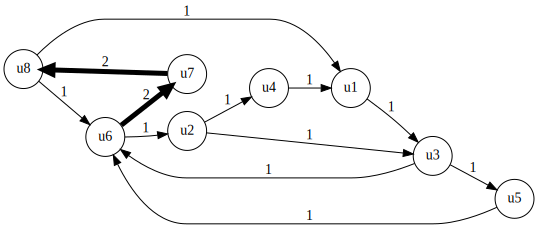

In [10]:
# Listing 21 Generating the output graph with Graphviz

import graphviz as pg

G = gv.Digraph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

values = [H[ui][uj] for ui in H for uj in H[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in H:
    for uj in H[ui]:
        x = H[ui][uj]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ui, uj, label=str(x), penwidth=str(y))

G

> Working together measure

In [11]:
# Listing 22 Implementing the working together algorithm
W = dict()

for caseid in log:
    S = set()
    for i in range(0, len(log[caseid])):
        ui = log[caseid][i][1]
        S.add(ui)
    S = sorted(list(S))
    for i in range(0, len(S)-1):
        for j in range(i+1, len(S)):
            ui = S[i]
            uj = S[j]
            if ui not in W:
                W[ui] = dict()
            if uj not in W[ui]:
                W[ui][uj] = 0
            W[ui][uj] += 1

for ui in sorted(W.keys()):
    for uj in sorted(W[ui].keys()):
        print ui, '--', uj, ':', W[ui][uj]

u1 -- u2 : 3
u1 -- u3 : 2
u1 -- u4 : 1
u1 -- u5 : 1
u1 -- u6 : 2
u1 -- u7 : 2
u1 -- u8 : 2
u2 -- u3 : 2
u2 -- u4 : 1
u2 -- u5 : 1
u2 -- u6 : 2
u2 -- u7 : 2
u2 -- u8 : 2
u3 -- u5 : 1
u3 -- u6 : 2
u3 -- u7 : 2
u3 -- u8 : 2
u5 -- u6 : 1
u5 -- u7 : 1
u5 -- u8 : 1
u6 -- u7 : 2
u6 -- u8 : 2
u7 -- u8 : 2


Interpret the following network

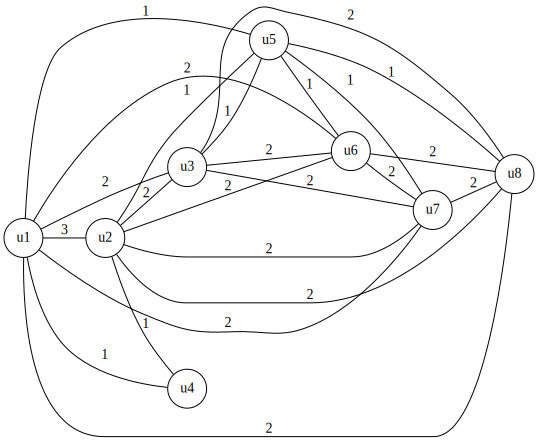

In [12]:
# Listing 24 Generating an undirected graph with PyGraphviz
import graphviz as gv

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

for ui in W:
    for uj in W[ui]:
        G.edge(ui, uj, label=str(W[ui][uj]))

G

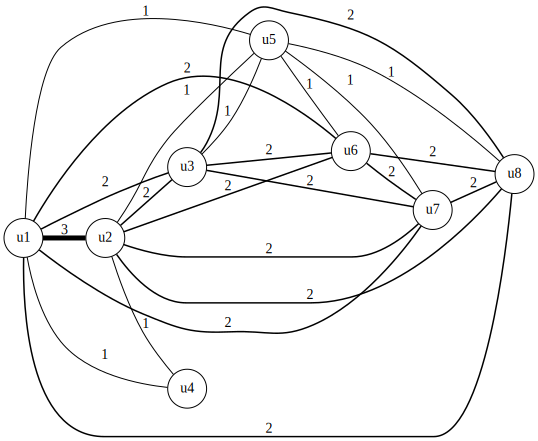

In [13]:
# Listing 24 Generating an undirected graph with PyGraphviz
import graphviz as gv

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

values = [W[ui][uj] for ui in W for uj in W[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in W:
    for uj in W[ui]:
        x = W[ui][uj]
        y = y_min + (y_max-y_min) * (float(x-x_min) / float(x_max-x_min))**3
        G.edge(ui, uj, label=str(x), penwidth=str(y))

G

> *Users and activites* measures

Understand the following graph

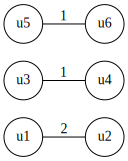

In [14]:
# Listing 26 Collecting the set of activities performed by each user
import graphviz as gv

UA = dict()
for caseid in log:
    for i in range(0, len(log[caseid])):
        ai = log[caseid][i][0]
        ui = log[caseid][i][1]
        if ui not in UA:
            UA[ui] = set()
        UA[ui].add(ai)

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

U = sorted(UA.keys())

for i in range(0, len(U)-1):
    for j in range(i+1, len(U)):
        ui = U[i]
        uj = U[j]
        x = len(UA[ui] & UA[uj])
        if x > 0:
            G.edge(ui, uj, label=str(x))

G

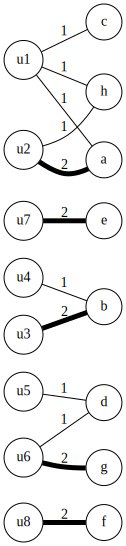

In [15]:
# Listing 28 Counting the number of times that each user performed each task

import graphviz as gv

UA = dict()
for caseid in log:
    for i in range(0, len(log[caseid])):
        ai = log[caseid][i][0]
        ui = log[caseid][i][1]
        if ui not in UA:
            UA[ui] = dict()
        if ai not in UA[ui]:
            UA[ui][ai] = 0
        UA[ui][ai] += 1

G = gv.Graph(strict=False)

G.graph_attr['rankdir'] = 'LR'
G.node_attr['shape'] = 'circle'

values = [UA[ui][ai] for ui in UA for ai in UA[ui]]
x_min = min(values)
x_max = max(values)

y_min = 1.0
y_max = 5.0

for ui in UA:
    for ai in UA[ui]:
        x = UA[ui][ai]
        y = y_min + (y_max-y_min) * float(x-x_min) / float(x_max-x_min)
        G.edge(ui, ai, label=str(x), penwidth=str(y))

G

Performance perspective
=======================

Change legend localization by ', loc='upper center', bbox_to_anchor=(0.5, -0.05)'

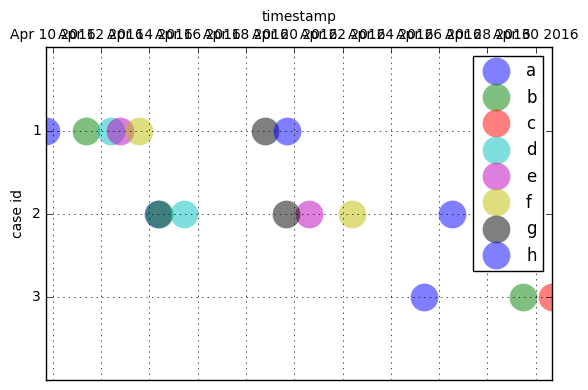

In [16]:
# Listing 35 Plotting a dotted chart with Matplotlib

import matplotlib.pyplot as plt

X = dict()
Y = dict()

caseids = sorted(log.keys(),key=lambda caseid: log[caseid][0][-1])

for (y, caseid) in enumerate(caseids): 
    for i in range(0, len(log[caseid])):
        (a, _, x) = log[caseid][i]
        if a not in X:
            X[a] = []
            Y[a] = []
        X[a].append(x)
        Y[a].append(y)

for a in sorted(X.keys()): 
    plt.plot(X[a], Y[a], 'o', label=a, markersize=20, markeredgewidth=0., alpha=0.5)

axes = plt.gca()

axes.set_yticks(range(len(caseids)))
axes.set_ylim(-1, len(caseids))
axes.set_yticklabels(caseids)
axes.set_ylabel('case id')
axes.invert_yaxis()

axes.set_xlabel('timestamp') 
axes.xaxis.tick_top() 
axes.xaxis.set_label_position('top')

plt.grid(True)
plt.legend(numpoints=1)
plt.tight_layout()
plt.show()


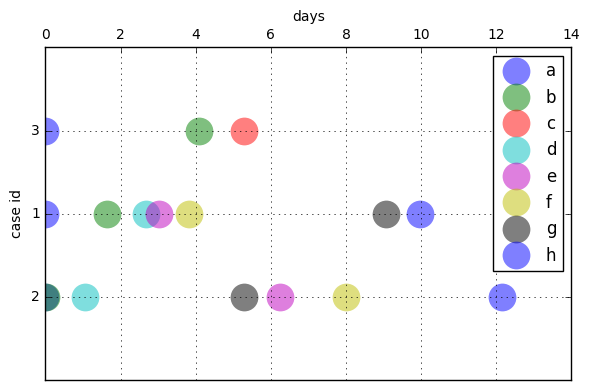

In [17]:
# Listing 36 Plotting a dotted chart with relative time

import matplotlib.pyplot as plt

X = dict()
Y = dict()

caseids = sorted(log.keys(),key=lambda caseid: log[caseid][-1][-1]-log[caseid][0][-1])

for (y, caseid) in enumerate(caseids):
    x0 = log[caseid][0][-1]
    for i in range(0, len(log[caseid])):
        (a, _, x) = log[caseid][i]
        if a not in X:
            X[a] = []
            Y[a] = []
        X[a].append((x-x0).total_seconds()/(24*3600))
        Y[a].append(y)

for a in sorted(X.keys()): 
    plt.plot(X[a], Y[a], 'o', label=a, markersize=20, markeredgewidth=0., alpha=0.5)

axes = plt.gca()

axes.set_yticks(range(len(caseids)))
axes.set_ylim(-1, len(caseids))
axes.set_yticklabels(caseids)
axes.set_ylabel('case id')
axes.invert_yaxis()

axes.set_xlabel('days') 
axes.xaxis.tick_top() 
axes.xaxis.set_label_position('top')

plt.grid(True)
plt.legend(numpoints=1)
plt.tight_layout()
plt.show()



a


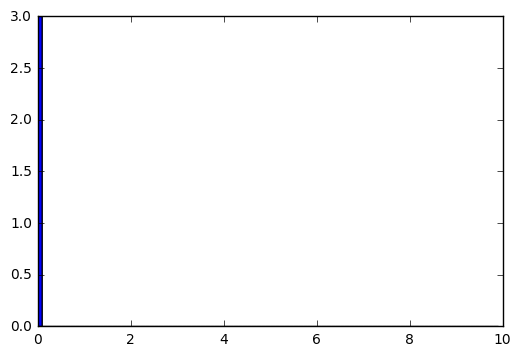

b


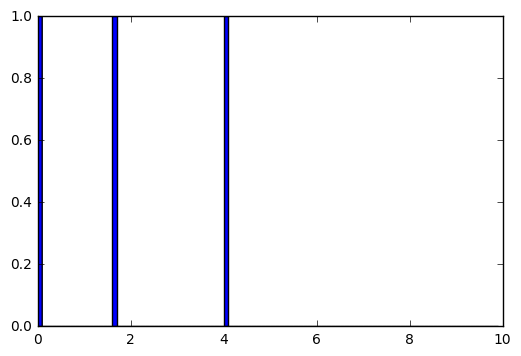

c


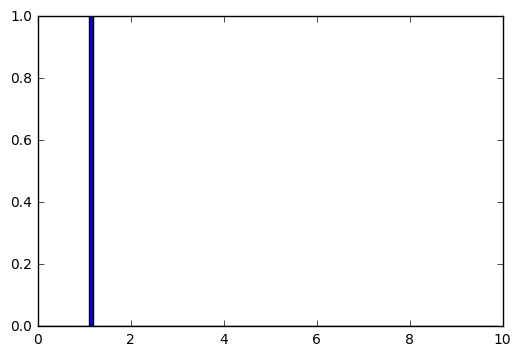

d


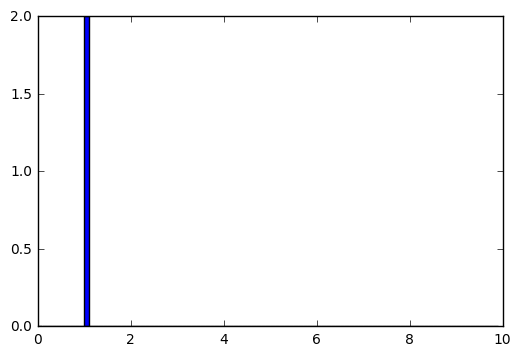

e


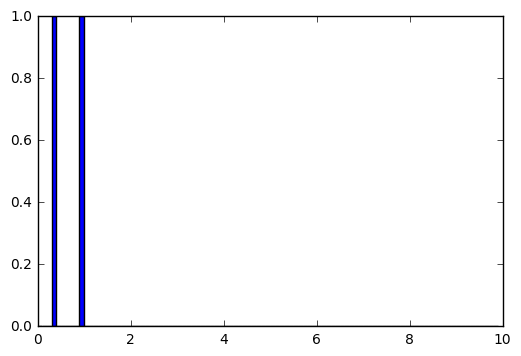

f


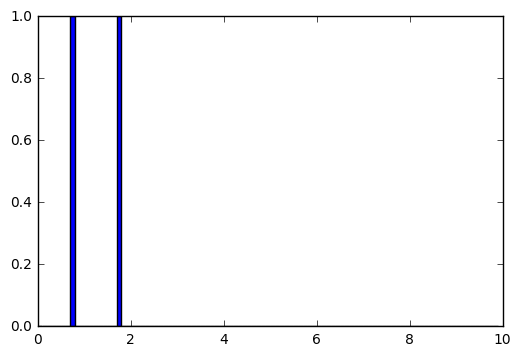

g


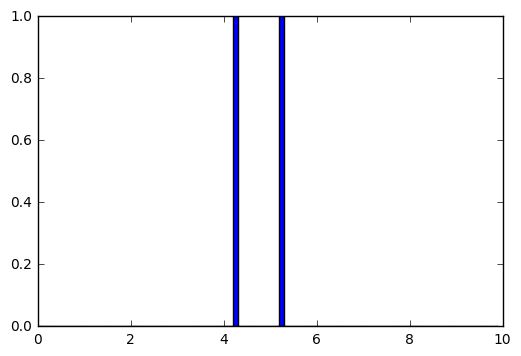

h


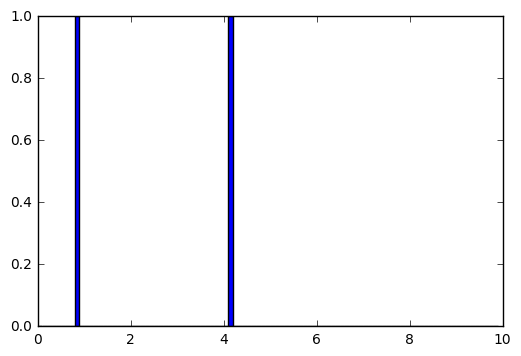

In [18]:
# Listing 37 Plotting the histograms of activity execution time

import numpy as np
import matplotlib.pyplot as plt

D = dict()

for caseid in log:
    for i in range(0, len(log[caseid])):
        (a, _, t) = log[caseid][i] 
        if i > 0:
            (_, _, t0) = log[caseid][i-1]
            d = (t-t0).total_seconds()/(24*3600)
        else:
            d = 0. 
        if a not in D:
            D[a] = []
        D[a].append(d)

i = 0
for a in sorted(D.keys()):
    print sorted(D.keys())[i]
    i += 1
    plt.hist(D[a], bins=[0.1*k for k in range(100)])
    plt.show()